In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from sklearn.datasets import fetch_openml

# Load the Boston Housing dataset
boston = fetch_openml(data_id=42165)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [7]:
boston

{'data':         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
 0        1          60       RL         65.0     8450   Pave   NaN      Reg   
 1        2          20       RL         80.0     9600   Pave   NaN      Reg   
 2        3          60       RL         68.0    11250   Pave   NaN      IR1   
 3        4          70       RL         60.0     9550   Pave   NaN      IR1   
 4        5          60       RL         84.0    14260   Pave   NaN      IR1   
 ...    ...         ...      ...          ...      ...    ...   ...      ...   
 1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
 1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
 1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
 1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
 1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   
 
      LandContour Utilities  .

# The dataset is in the form of dictionary. So we check for keys and features and then convert it into dataframe.

In [8]:
boston.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [9]:
boston.DESCR

"Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.\n\nWith 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.\n\nMSSubClass: Identifies the type of dwelling involved in the sale.\t\n\n        20\t1-STORY 1946 & NEWER ALL STYLES\n        30\t1-STORY 1945 & OLDER\n        40\t1-STORY W/FINISHED ATTIC ALL AGES\n        45\t1-1/2 STORY - UNFINISHED ALL AGES\n        50\t1-1/2 STORY FINISHED ALL AGES\n        60\t2-STORY 1946 & NEWER\n        70\t2-STORY 1945 & OLDER\n        75\t2-1/2 STORY ALL AGES\n        80\tSPLIT OR MULTI-LEVEL\n        85\tSPLIT FOYER\n        90\tDUPLEX - ALL STYLES AND AGES\n       120\t1-STORY PUD

In [10]:
boston.feature_names

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [11]:
boston.target

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

# Preparing the dataset from dictionary.

In [12]:
dataset = pd.DataFrame(boston.data)

In [13]:
dataset.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


Column names are not there, therefore we use columns attribute

In [14]:
dataset = pd.DataFrame(boston.data, columns = boston.feature_names)

In [15]:
dataset.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


above dataset does not contain dependent variable ie. Price. so we add the Price Feature or dependent variable.

In [16]:
dataset['Price'] = boston.target

here dataset is the dataset/dataframe and boston is the dictionary

In [17]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

All columns are in float64 datatype

In [19]:
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Price
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


dataset only check for numerical not categorical columns. In this case, all columns are numerical ie. float64.

In [20]:
# Checking for missing value count

dataset.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Price              0
Length: 81, dtype: int64

There is no missing value present in dataset.

# Exploratory data analysis(EDA)

In case of numerical dataset, there is high chance for calculating correlation between the variables/ attributes.

# correlation

In [21]:
dataset.corr()

ValueError: could not convert string to float: 'RL'

Here we have to analysis correlation between 2 independent variables as well as independent and dependent variables.
corr ===> (-1,+1)\n
if 2 independent variables have correlation nearly equal to 1 it is called multicollinearity and we have to remove any one of them.


From the table we can say that if CRIM==1.00 then Price will be negatively correlated to it. That is,less house price.   same for the others 

In [ ]:
import seaborn as sns
sns.pairplot(dataset)

It is used for more understanding of the correlation.

In [22]:
plt.scatter(dataset['CRIM'], dataset['Price'])
plt.xlabel('Crime Rate')
plt.ylabel('Price')
plt.show()

KeyError: 'CRIM'

We can say that if the crime rate is less then price of the house is very high.

In [23]:
plt.scatter(dataset['RM'], dataset['Price'])
plt.xlabel('Average no. of rooms')
plt.ylabel('Price')
plt.show()

KeyError: 'RM'

As the average number of rooms increases the price also increases.

<AxesSubplot:xlabel='RM', ylabel='Price'>

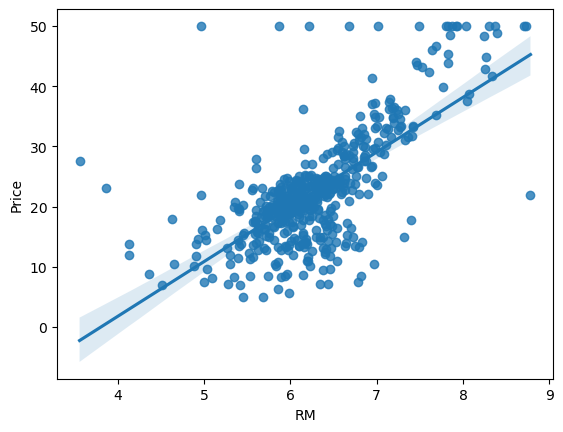

In [34]:
sns.regplot(x='RM', y='Price', data = dataset)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RM', ylabel='Price'>

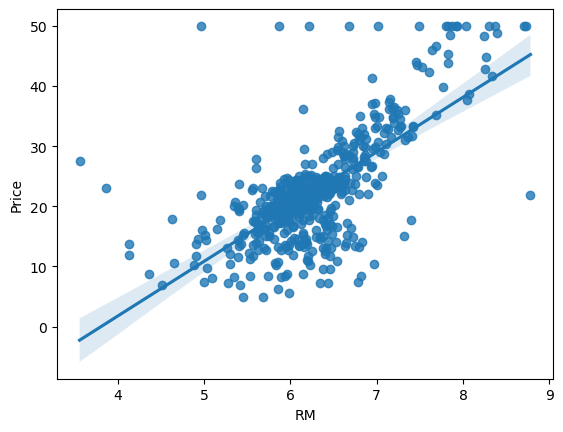

In [35]:
sns.regplot(dataset['RM'], dataset['Price'], data = dataset)

<AxesSubplot:xlabel='LSTAT', ylabel='Price'>

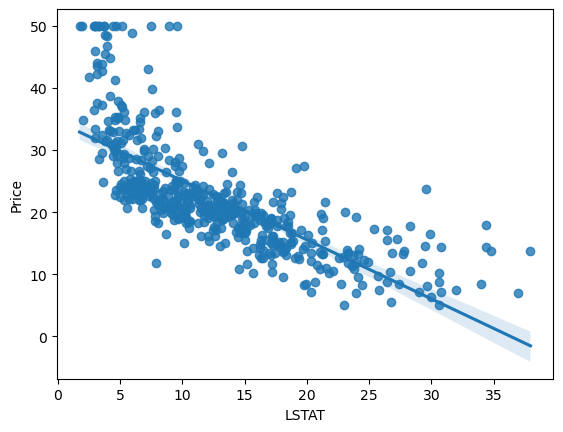

In [36]:
sns.regplot(x='LSTAT', y='Price', data = dataset)

From the plot, it is seen that % lower status of the population is negatively correlated to price.

<AxesSubplot:xlabel='CHAS', ylabel='Price'>

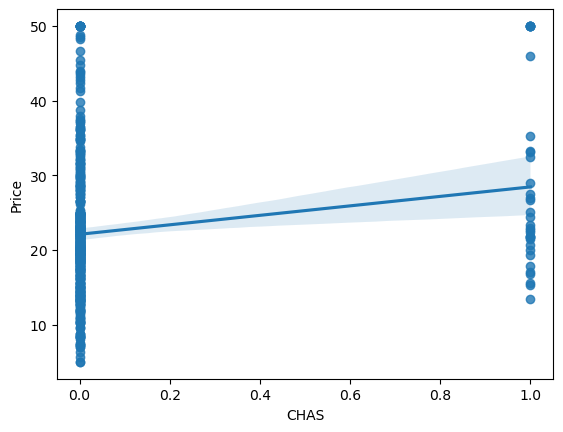

In [38]:
sns.regplot(x='CHAS', y='Price', data = dataset)

No correlation is present there.

<AxesSubplot:xlabel='PTRATIO', ylabel='Price'>

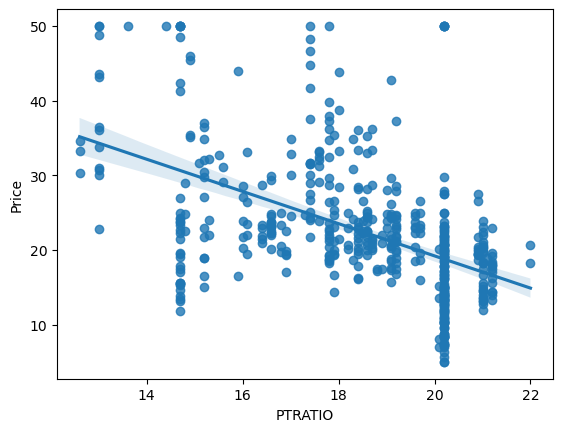

In [39]:
sns.regplot(x='PTRATIO', y='Price', data = dataset)

As the PTRATIO or Pupil teacher ratio increases the price decreases.

Pupil-teacher ratio is calculated by dividing the number of students at the specified level of education by the number of teachers at the same level of education.

# Independent and dependent features:

In [40]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [41]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [55]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [74]:
y.head()

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


# Train_test_split

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [77]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41
272,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73
135,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,21.2,394.67,16.96
298,0.06466,70.0,2.24,0.0,0.400,6.345,20.1,7.8278,5.0,358.0,14.8,368.24,4.97
122,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74
192,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87
117,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6.0,432.0,17.8,394.51,10.30
47,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80


In [78]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
428,7.36711,0.0,18.10,0.0,0.679,6.193,78.1,1.9356,24.0,666.0,20.2,96.73,21.52
385,16.81180,0.0,18.10,0.0,0.700,5.277,98.1,1.4261,24.0,666.0,20.2,396.90,30.81
308,0.49298,0.0,9.90,0.0,0.544,6.635,82.5,3.3175,4.0,304.0,18.4,396.90,4.54


In [79]:
y_train

,Price
141,14.4
272,24.4
135,18.1
298,22.5
122,20.5
...,...
323,18.5
192,36.4
117,19.2
47,16.6


In [80]:
y_test

,Price
329,22.6
371,50.0
219,23.0
403,8.3
78,21.2
...,...
4,36.2
428,11.0
385,7.2
308,22.8


# Standardize the dataset

Q Why do you standardize the dataset in linear regression?

Internally we use gradient descent. Our main aim is to come to the global minima. and to come to the global minima we have to make sure that all our independent features should be in the same scale. Because of that the conversions will happen quickly.

In [81]:
from sklearn.preprocessing import StandardScaler 

In [82]:
scaler = StandardScaler()

In [83]:
X_train = scaler.fit_transform(X_train)

In [84]:
X_test = scaler.transform(X_test)

In [85]:
X_train

array([[-0.20735619, -0.49997924,  1.54801583, ...,  1.2272573 ,
         0.42454294,  3.10807269],
       [-0.38886492,  0.34677427, -0.58974728, ...,  0.05696346,
         0.40185312, -0.66643035],
       [-0.33573486, -0.49997924,  1.54801583, ...,  1.2272573 ,
         0.39846135,  0.63936662],
       ...,
       [-0.38450355, -0.49997924, -0.15303077, ..., -0.30312696,
         0.39659002, -0.30284441],
       [-0.37511786, -0.49997924, -0.59690657, ..., -0.25811566,
         0.37588849,  0.89967717],
       [-0.38592298, -0.49997924, -1.00641779, ..., -0.84326258,
         0.42454294,  0.31822262]])

In [86]:
X_test

array([[-0.39454262, -0.49997924, -1.12239824, ..., -0.70822867,
         0.17086147, -0.72160487],
       [ 0.70419882, -0.49997924,  1.00534187, ...,  0.77714428,
         0.0648977 , -0.41177872],
       [-0.38890688, -0.49997924,  0.4025299 , ..., -0.93328518,
         0.38758427, -0.27454978],
       ...,
       [ 1.61285743, -0.49997924,  1.00534187, ...,  0.77714428,
         0.42454294,  2.59876943],
       [-0.34350332, -0.49997924, -0.1687812 , ..., -0.03305915,
         0.42454294, -1.11772962],
       [-0.39902507, -0.49997924, -1.27417512, ...,  0.10197476,
         0.39202867, -1.02294263]])

# Training of the model

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
regression = LinearRegression()

In [91]:
regression.fit(X_train, y_train)

LinearRegression()

Here we are creating a hyperplane of so many independent variables

Whenever we create a linear regression plane there are always 2 things present    1) coefficients   2) intercept

In [92]:
print(regression.coef_)

[[-1.01190059  1.05028027  0.07920966  0.618962   -1.87369102  2.70526979
  -0.27957264 -3.09766486  2.09689998 -1.88606339 -2.26110466  0.58264309
  -3.44049838]]


here first coefficient determines that whenever the dependent variable ie. price increases, then there is coeff of regression of CRIM ie criminal rate is -1.01190059 that is negative that is decreases.

In [93]:
print(regression.intercept_)

[22.74548023]


There is only 1 interept for all coefficients.

In [94]:
# On which parameters the model has been trained?

regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

# First we do prediction with test data and then we can predict with new data

In [95]:
reg_pred = regression.predict(X_test)

In [96]:
reg_pred

array([[24.9357079 ],
       [23.75163164],
       [29.32638296],
       [11.97534566],
       [21.37272478],
       [19.19148525],
       [20.5717479 ],
       [21.21154015],
       [19.04572003],
       [20.35463238],
       [ 5.44119126],
       [16.93688709],
       [17.15482272],
       [ 5.3928209 ],
       [40.20270696],
       [32.31327348],
       [22.46213268],
       [36.50124666],
       [31.03737014],
       [23.17124551],
       [24.74815321],
       [24.49939403],
       [20.6595791 ],
       [30.4547583 ],
       [22.32487164],
       [10.18932894],
       [17.44286422],
       [18.26103077],
       [35.63299326],
       [20.81960303],
       [18.27218007],
       [17.72047628],
       [19.33772473],
       [23.62254823],
       [28.97766856],
       [19.45036239],
       [11.13170639],
       [24.81843595],
       [18.05294835],
       [15.59712226],
       [26.21043403],
       [20.81140432],
       [22.17349382],
       [15.48367365],
       [22.62261604],
       [24

Now this reg_pred is done on X values and now we have to comapre this with y values.

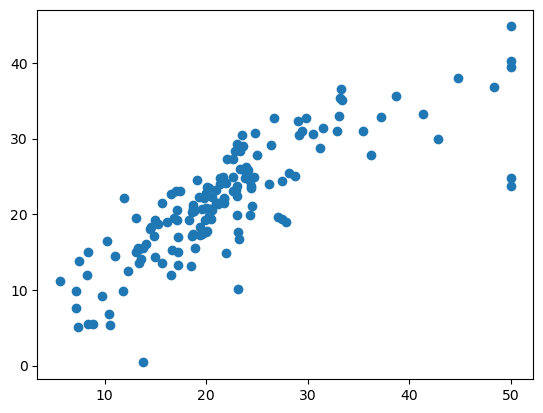

In [97]:
plt.scatter(y_test, reg_pred)

This is somewhat like linear. So we can say that we have achieved good prediction

In [98]:
# Residuals

residuals = y_test - reg_pred

In [99]:
residuals

,Price
329,-2.335708
371,26.248368
219,-6.326383
403,-3.675346
78,-0.172725
...,...
4,8.388923
428,-3.506816
385,-0.373699
308,-5.534807


# Performance matrices

In [101]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [102]:
print(mean_absolute_error(y_test, reg_pred))
print(mean_squared_error(y_test, reg_pred))
print(np.sqrt(mean_squared_error(y_test, reg_pred)))

3.6099040603818127
27.195965766883198
5.214975145375402


# R square and adjusted r squared

In [103]:
from sklearn.metrics import r2_score
score = r2_score(y_test, reg_pred)
score

0.6733825506400196

In [104]:
# adjusted r squared

1-(1 - score)*(len(y_test) - 1) / (len(y_test) - X_test.shape[-1] - 1)

0.642614240193065

since, 0.67 > 0.64.... our model is perdicting very good.

# New data prediction

In [106]:
boston.data[0].shape

(13,)

One dimensional data is there. There are 13 columns are selected only without specification of rows.

In [111]:
boston.data[0].reshape(1,-1)

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [112]:
boston.data[0].reshape(1,-1).shape

(1, 13)

One row is selected here and 13 columns

Whenever we get a new data, we have to first do standardisation of that data for same scaling with all independent variables.

# Standardize/Transformation of the new data.

In [119]:
scaled_new_data = scaler.transform(boston.data[0].reshape(1,-1))

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [120]:
regression.predict(scaled_new_data)

array([[30.29079542]])

In Python, the pickle module is used for serializing and deserializing Python objects. It allows you to convert complex data structures, such as lists, dictionaries, classes, and more, into a binary format that can be easily stored in a file or transmitted over the network. The process of converting objects into a byte stream is called "pickling," and the reverse process of reconstructing objects from a byte stream is called "unpickling."

# Pickling the model file for deployment

In [121]:
import pickle

In [127]:
 #You can pickle an object and save it to a file using the pickle.dump() method:
    
pickle.dump(regression, open('RegressionModel.pkl', 'wb'))      

In [128]:
#  To retrieve the pickled data from the file and reconstruct the original object, you can use the pickle.load() method:

pickled_model = pickle.load(open('RegressionModel.pkl', 'rb'))    

In [129]:
# Prediction
pickled_model.predict(scaled_new_data)

array([[30.29079542]])